In [1]:
import math
from tensorboardX import SummaryWriter
sess = None

In [2]:
import tensorflow as tf
import collections
gpu_options = tf.GPUOptions(allow_growth=True,per_process_gpu_memory_fraction=0.8)
tf.reset_default_graph()
sess = tf.InteractiveSession(config=tf.ConfigProto(gpu_options=gpu_options))

In [3]:
from gym import envs
print(envs.registry.all())

dict_values([EnvSpec(Copy-v0), EnvSpec(RepeatCopy-v0), EnvSpec(ReversedAddition-v0), EnvSpec(ReversedAddition3-v0), EnvSpec(DuplicatedInput-v0), EnvSpec(Reverse-v0), EnvSpec(CartPole-v0), EnvSpec(CartPole-v1), EnvSpec(MountainCar-v0), EnvSpec(MountainCarContinuous-v0), EnvSpec(Pendulum-v0), EnvSpec(Acrobot-v1), EnvSpec(LunarLander-v2), EnvSpec(LunarLanderContinuous-v2), EnvSpec(BipedalWalker-v2), EnvSpec(BipedalWalkerHardcore-v2), EnvSpec(CarRacing-v0), EnvSpec(Blackjack-v0), EnvSpec(KellyCoinflip-v0), EnvSpec(KellyCoinflipGeneralized-v0), EnvSpec(FrozenLake-v0), EnvSpec(FrozenLake8x8-v0), EnvSpec(CliffWalking-v0), EnvSpec(NChain-v0), EnvSpec(Roulette-v0), EnvSpec(Taxi-v2), EnvSpec(GuessingGame-v0), EnvSpec(HotterColder-v0), EnvSpec(Reacher-v2), EnvSpec(Pusher-v2), EnvSpec(Thrower-v2), EnvSpec(Striker-v2), EnvSpec(InvertedPendulum-v2), EnvSpec(InvertedDoublePendulum-v2), EnvSpec(HalfCheetah-v2), EnvSpec(Hopper-v2), EnvSpec(Swimmer-v2), EnvSpec(Walker2d-v2), EnvSpec(Ant-v2), EnvSpec(Hum

6
done


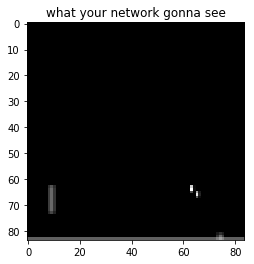

In [4]:
from wrappers import make_env
import gym
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
env_name = "Pong-v0"
env_name1 = "Breakout-v0"
env = make_env(env_name)
observation_shape = env.observation_space.shape
n_actions = env.action_space.n
print(n_actions)
obs = env.reset()
obs, r, done, _ = env.step(2)
#print(obs.shape)
#print(is_done)
done = False
for _ in range(2000):
    obs, _, done, _ = env.step(3)
    if done:
        print('done')
        break
plt.title("what your network gonna see")
plt.imshow(obs[0,:,:],interpolation='none',cmap='gray');

In [5]:

from dqnagent import DQNAgent
from dqnagent import ExperienceBuffer
EXP_BUFFER_CAPACITY = 100000

#agent.epsilon = 0.5

dqn_config = {
    'GAMMA' : 0.99,
    'LEARNING_RATE' : 1e-3,
    'STEPS_PER_EPOCH' : 5,
    'BATCH_SIZE' : 64,
    'EPSILON' : 0.5,
    'MIN_EPSILON' : 0.02,
    'NUM_EPOCHS' : 10**5,
    'NUM_EPOCHS_TO_COPY' : 1000,
    'EPS_DECAY_RATE' : 0.99,
    'NAME' : 'DQN',
    'IS_DOUBLE' : True,
    'IS_DUELING' : True,
    'DUELING_TYPE' : 'AVERAGE'
    }
ddqn_config = {
    'GAMMA' : 0.99,
    'LEARNING_RATE' : 1e-3,
    'STEPS_PER_EPOCH' : 5,
    'BATCH_SIZE' : 64,
    'EPSILON' : 0.5,
    'MIN_EPSILON' : 0.02,
    'NUM_EPOCHS' : 10**5,
    'NUM_EPOCHS_TO_COPY' : 1000,
    'EPS_DECAY_RATE' : 0.99,
    'NAME' : 'DDQN',
    'IS_DOUBLE' : True,
    'IS_DUELING' : True,
    'DUELING_TYPE' : 'AVERAGE'
    }
agent = DQNAgent(env, sess, ExperienceBuffer(EXP_BUFFER_CAPACITY), env_name, config = dqn_config)

In [ ]:
env.reset()
agent.train()

0
-20.6666666667
278.333333333
500
-21.0
253.333333333
1000
-21.0
259.0
1500
-21.0
253.0
2000
-20.6666666667
273.333333333
2500
-20.6666666667
283.0
3000
-21.0
259.666666667
3500
-20.6666666667
264.666666667
4000
-21.0
260.666666667
4500
-20.6666666667
288.333333333
5000
-21.0
254.666666667
5500
-20.6666666667
275.0
6000
-21.0
262.333333333
6500
-20.6666666667
291.333333333
7000
-21.0
252.666666667
7500
-20.6666666667
274.0
8000
-20.0
294.666666667
8500
-21.0
255.0
9000
-20.6666666667
289.333333333
9500
-21.0
291.0
10000
-21.0
303.0
10500
-21.0
253.0
11000
-21.0
283.333333333
11500
-20.0
286.666666667
12000
-21.0
253.666666667
12500
-20.3333333333
290.666666667
13000
-21.0
288.0
13500
-21.0
269.333333333
14000
-20.6666666667
288.0
14500
-20.6666666667
303.666666667
15000
-20.6666666667
276.666666667
15500
-21.0
255.333333333
16000
-20.6666666667
266.666666667
16500
-20.3333333333
298.333333333
17000
-21.0
262.666666667
17500
-21.0
272.666666667
18000
-21.0
263.333333333
18500
-20.66666

In [ ]:
#agent.epsilon = 0.2
#agent.train()

In [ ]:
from wrappers import make_env_with_monitor
print(env.unwrapped.get_action_meanings())
def evaluate(env,t_max=1000):
    rewards = []
    print('reset')
    s = env.reset()
    reward = 0
    for it in range(t_max):
        #e.render()
        qvalues = agent.get_qvalues([s])
        action = np.argmax(qvalues)
        s, r, done, _ = env.step(action)
        reward += r
        rewards.append(reward)
        
            
        if done:
            
            break       
        
    return np.mean(rewards)


import gym.wrappers
env_monitor = make_env_with_monitor(env_name, 'video9')
sessions = [evaluate(env_monitor) for _ in range(1)]
env_monitor.close()

In [ ]:
#tf.reset_default_graph()
#agent = DQNAgent(env, sess, ExperienceBuffer(EXP_BUFFER_CAPACITY), env_name, config = dqn_config)

In [ ]:
#env.reset()
#agent.train()